In [1]:
# import
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd

C:\Users\pslav\AppData\Local\Temp\ipykernel_9600\3433955135.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
MACCSkeys.smartsPatts

{1: ('?', 0),
 2: ('[#104]', 0),
 3: ('[#32,#33,#34,#50,#51,#52,#82,#83,#84]', 0),
 4: ('[Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr]', 0),
 5: ('[Sc,Ti,Y,Zr,Hf]', 0),
 6: ('[La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu]', 0),
 7: ('[V,Cr,Mn,Nb,Mo,Tc,Ta,W,Re]', 0),
 8: ('[!#6;!#1]1~*~*~*~1', 0),
 9: ('[Fe,Co,Ni,Ru,Rh,Pd,Os,Ir,Pt]', 0),
 10: ('[Be,Mg,Ca,Sr,Ba,Ra]', 0),
 11: ('*1~*~*~*~1', 0),
 12: ('[Cu,Zn,Ag,Cd,Au,Hg]', 0),
 13: ('[#8]~[#7](~[#6])~[#6]', 0),
 14: ('[#16]-[#16]', 0),
 15: ('[#8]~[#6](~[#8])~[#8]', 0),
 16: ('[!#6;!#1]1~*~*~1', 0),
 17: ('[#6]#[#6]', 0),
 18: ('[#5,#13,#31,#49,#81]', 0),
 19: ('*1~*~*~*~*~*~*~1', 0),
 20: ('[#14]', 0),
 21: ('[#6]=[#6](~[!#6;!#1])~[!#6;!#1]', 0),
 22: ('*1~*~*~1', 0),
 23: ('[#7]~[#6](~[#8])~[#8]', 0),
 24: ('[#7]-[#8]', 0),
 25: ('[#7]~[#6](~[#7])~[#7]', 0),
 26: ('[#6]=;@[#6](@*)@*', 0),
 27: ('[I]', 0),
 28: ('[!#6;!#1]~[CH2]~[!#6;!#1]', 0),
 29: ('[#15]', 0),
 30: ('[#6]~[!#6;!#1](~[#6])(~[#6])~*', 0),
 31: ('[!#6;!#1]~[F,Cl,Br,I]',

In [3]:
maccs = []
for idx, (pattern, n) in MACCSkeys.smartsPatts.items():
    mac = Chem.MolFromSmarts(pattern)
    if mac:
        maccs.append(mac)
    else:
        maccs.append(None)

[17:05:45] SMARTS Parse Error: syntax error while parsing: ?
[17:05:45] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'
[17:05:45] SMARTS Parse Error: syntax error while parsing: ?
[17:05:45] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'
[17:05:45] SMARTS Parse Error: syntax error while parsing: ?
[17:05:45] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'


In [4]:
print(maccs[:3])
print(len(maccs))

[None, <rdkit.Chem.rdchem.Mol object at 0x0000012FD19D8820>, <rdkit.Chem.rdchem.Mol object at 0x0000012FD19D87B0>]
166


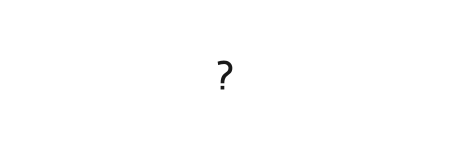

In [5]:
maccs[100]

In [6]:
# nacteni set1 (drugbank)
drugbank = [mol for mol in Chem.SDMolSupplier('data/drugbank.sdf') if mol]

[17:05:46] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[17:05:46] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[17:05:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[17:05:47] ERROR: Could not sanitize molecule ending on line 250947
[17:05:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[17:05:47] Explicit valence for atom # 17 O, 3, is greater than permitted
[17:05:47] ERROR: Could not sanitize molecule ending on line 258130
[17:05:47] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[17:05:47] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[17:05:47] ERROR: Could not sanitize molecule ending on line 261581
[17:05:47] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[17:05:47] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[17:05:47] ERROR: Could not 

In [7]:
drugbank

 ...]

In [8]:
drugb = pd.DataFrame(drugbank, columns=['Mol'])
drugb['Smiles'] = drugb.apply(lambda row: Chem.MolToSmiles(row['Mol']), axis=1)
drugb['Source'] = 'drugbank'
drugb['Molecule ChEMBL ID'] = drugb.apply(lambda row: row['Mol'].GetProp('DATABASE_ID'), axis=1)
drugb.rename({'Molecule ChEMBL ID':'ID'}, axis=1, inplace=True)
drugb = drugb[['ID', 'Mol', 'Smiles', 'Source']]

In [9]:
drugb

,ID,Mol,Smiles,Source
0,DB00006,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,drugbank
1,DB00014,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,drugbank
2,DB00035,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,drugbank
3,DB00050,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,drugbank
4,DB00091,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,drugbank
...,...,...,...,...
7115,DB13154,<rdkit.Chem.rdchem.Mol object at 0x0000012FD89...,Oc1ccc(Cl)cc1,drugbank
7116,DB13155,<rdkit.Chem.rdchem.Mol object at 0x0000012FD89...,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,drugbank
7117,DB13156,<rdkit.Chem.rdchem.Mol object at 0x0000012FD89...,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,drugbank
7118,DB13157,<rdkit.Chem.rdchem.Mol object at 0x0000012FD89...,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],drugbank


In [10]:
# nacteni set2 (mtor)
mtor_in = pd.read_csv('data/chembl_mtor_ic50.csv', delimiter=';')

In [11]:
mtor = mtor_in[['Molecule ChEMBL ID', 'Smiles']]
mtor['Source'] = 'mtor'
mtor['Mol'] = mtor.apply(lambda row: Chem.MolFromSmiles(row[1]), axis=1)
mtor.rename({'Molecule ChEMBL ID':'ID'}, axis=1, inplace=True)
mtor = mtor[['ID', 'Mol', 'Smiles', 'Source']]

C:\Users\pslav\AppData\Local\Temp\ipykernel_9600\2976773415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtor['Source'] = 'mtor'
C:\Users\pslav\AppData\Local\Temp\ipykernel_9600\2976773415.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mtor['Mol'] = mtor.apply(lambda row: Chem.MolFromSmiles(row[1]), axis=1)
C:\Users\pslav\AppData\Local\Temp\ipykernel_9600\2976773415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [12]:
mtor

,ID,Mol,Smiles,Source
0,CHEMBL1773577,<rdkit.Chem.rdchem.Mol object at 0x0000012FD01...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,mtor
1,CHEMBL1773561,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,mtor
2,CHEMBL1773077,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,mtor
3,CHEMBL1773580,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,mtor
4,CHEMBL1773578,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,mtor
...,...,...,...,...
4591,CHEMBL4287809,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,mtor
4592,CHEMBL4280265,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,mtor
4593,CHEMBL4246563,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,mtor
4594,CHEMBL4244147,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,mtor


In [13]:
all_drugs = pd.concat([drugb, mtor]).reset_index(drop=True)
all_drugs

,ID,Mol,Smiles,Source
0,DB00006,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,drugbank
1,DB00014,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,drugbank
2,DB00035,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,drugbank
3,DB00050,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,drugbank
4,DB00091,<rdkit.Chem.rdchem.Mol object at 0x0000012FD1A...,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,drugbank
...,...,...,...,...
11711,CHEMBL4287809,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,mtor
11712,CHEMBL4280265,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,mtor
11713,CHEMBL4246563,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,mtor
11714,CHEMBL4244147,<rdkit.Chem.rdchem.Mol object at 0x0000012FDFA...,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,mtor


In [16]:
# drugb.to_csv('drugbank_data.csv', sep=',', header=True, index=False)
# mtor.to_csv('mtor_data.csv', sep=',', header=True, index=False)
# all_drugs.to_csv('alldrugs_data.csv', sep=',', header=True, index=False)

In [17]:
mol = Chem.MolFromSmiles("CCCCCC")

In [18]:
fp = MACCSkeys.GenMACCSKeys(mol)
list(fp.GetOnBits())

[108, 114, 115, 116, 118, 129, 147, 149, 155, 160]

In [19]:
#all_drugs['MACCS'] = all_drugs.apply(lambda row: MACCSkeys.GenMACCSKeys(row['Mol']), axis=1)

In [14]:
keys_I = []
for drug in drugb['Mol']:
    keys_I.append(MACCSkeys.GenMACCSKeys(drug))
    
keys_II = []
for drug in mtor['Mol']:
    keys_II.append(MACCSkeys.GenMACCSKeys(drug))

In [15]:
print(len(keys_I))
keys_I[:3]

7120


In [16]:
print(len(keys_II))
keys_II[:3]

4596


In [17]:
drugb['MACCS'] = keys_I
mtor['MACCS'] = keys_II

In [19]:
maccs_stats_DB = list(drugb.apply(lambda row: list(row['MACCS'].GetOnBits()), axis=1))
maccs_stats_m = list(mtor.apply(lambda row: list(row['MACCS'].GetOnBits()), axis=1))

In [20]:
patterns_I = []

for key in keys_I:
    patts = list(key.GetOnBits())
    patterns_I.extend(patts)

patterns_II = []

for key in keys_II:
    patts = list(key.GetOnBits())
    patterns_II.extend(patts)

In [31]:
from collections import Counter

In [32]:
counts_I = Counter(patterns_I)
counts_II = Counter(patterns_II)

patterns_I_counts = dict(sorted(counts_I.items(), key=lambda item: item[1], reverse=True))
patterns_II_counts = dict(sorted(counts_II.items(), key=lambda item: item[1], reverse=True))

In [36]:
patterns_I_counts

{164: 6512,
 165: 6137,
 163: 5802,
 161: 5687,
 159: 5682,
 158: 5357,
 156: 5261,
 157: 5260,
 162: 5179,
 155: 4858,
 154: 4677,
 131: 4642,
 153: 4557,
 137: 4498,
 151: 4411,
 146: 4382,
 139: 4294,
 160: 4240,
 142: 4176,
 152: 3968,
 150: 3945,
 127: 3827,
 143: 3827,
 148: 3800,
 121: 3768,
 145: 3702,
 132: 3561,
 90: 3536,
 125: 3452,
 147: 3402,
 111: 3380,
 117: 3358,
 118: 3353,
 91: 3346,
 136: 3271,
 140: 3269,
 120: 3229,
 104: 3213,
 95: 3195,
 110: 3117,
 96: 3104,
 98: 3061,
 122: 2979,
 105: 2945,
 129: 2854,
 100: 2848,
 92: 2829,
 144: 2807,
 123: 2796,
 97: 2790,
 83: 2787,
 101: 2779,
 112: 2732,
 133: 2721,
 128: 2694,
 106: 2672,
 138: 2585,
 126: 2556,
 149: 2513,
 65: 2512,
 85: 2500,
 89: 2481,
 124: 2470,
 109: 2378,
 80: 2303,
 113: 2294,
 79: 2267,
 77: 2251,
 54: 2249,
 135: 2200,
 72: 2199,
 84: 2111,
 75: 2096,
 82: 2082,
 102: 1938,
 116: 1902,
 53: 1898,
 115: 1831,
 130: 1798,
 62: 1756,
 108: 1737,
 86: 1686,
 93: 1655,
 134: 1637,
 57: 1636,
 88:

In [58]:
# normalize
patterns_I_counts_norm = {key: value / len(drugb) for key, value in patterns_I_counts.items()}
patterns_II_counts_norm = {key: value / len(mtor) for key, value in patterns_II_counts.items()}

In [59]:
patterns_I_counts_norm

{164: 0.9146067415730337,
 165: 0.861938202247191,
 163: 0.8148876404494382,
 161: 0.7987359550561798,
 159: 0.7980337078651686,
 158: 0.7523876404494382,
 156: 0.7389044943820224,
 157: 0.7387640449438202,
 162: 0.7273876404494382,
 155: 0.6823033707865168,
 154: 0.6568820224719101,
 131: 0.6519662921348315,
 153: 0.6400280898876405,
 137: 0.6317415730337078,
 151: 0.6195224719101123,
 146: 0.6154494382022472,
 139: 0.6030898876404495,
 160: 0.5955056179775281,
 142: 0.5865168539325842,
 152: 0.5573033707865168,
 150: 0.5540730337078652,
 127: 0.5375,
 143: 0.5375,
 148: 0.5337078651685393,
 121: 0.5292134831460674,
 145: 0.5199438202247191,
 132: 0.5001404494382022,
 90: 0.4966292134831461,
 125: 0.4848314606741573,
 147: 0.47780898876404493,
 111: 0.4747191011235955,
 117: 0.47162921348314607,
 118: 0.4709269662921348,
 91: 0.4699438202247191,
 136: 0.45941011235955054,
 140: 0.45912921348314606,
 120: 0.45351123595505616,
 104: 0.4512640449438202,
 95: 0.4487359550561798,
 110: 0.4

In [60]:
print(len(patterns_I_counts_norm), len(patterns_II_counts_norm))

163 146


In [61]:
# equalize dict lengths
for i in range(len(patterns_I_counts)):
    if not i in patterns_I_counts_norm:
        patterns_I_counts_norm[i] = 0
    if not i in patterns_II_counts_norm:
        patterns_II_counts_norm[i] = 0

print(len(patterns_I_counts_norm), len(patterns_II_counts_norm))

167 167


In [62]:
patterns_I_counts_norm

{164: 0.9146067415730337,
 165: 0.861938202247191,
 163: 0.8148876404494382,
 161: 0.7987359550561798,
 159: 0.7980337078651686,
 158: 0.7523876404494382,
 156: 0.7389044943820224,
 157: 0.7387640449438202,
 162: 0.7273876404494382,
 155: 0.6823033707865168,
 154: 0.6568820224719101,
 131: 0.6519662921348315,
 153: 0.6400280898876405,
 137: 0.6317415730337078,
 151: 0.6195224719101123,
 146: 0.6154494382022472,
 139: 0.6030898876404495,
 160: 0.5955056179775281,
 142: 0.5865168539325842,
 152: 0.5573033707865168,
 150: 0.5540730337078652,
 127: 0.5375,
 143: 0.5375,
 148: 0.5337078651685393,
 121: 0.5292134831460674,
 145: 0.5199438202247191,
 132: 0.5001404494382022,
 90: 0.4966292134831461,
 125: 0.4848314606741573,
 147: 0.47780898876404493,
 111: 0.4747191011235955,
 117: 0.47162921348314607,
 118: 0.4709269662921348,
 91: 0.4699438202247191,
 136: 0.45941011235955054,
 140: 0.45912921348314606,
 120: 0.45351123595505616,
 104: 0.4512640449438202,
 95: 0.4487359550561798,
 110: 0.4

In [64]:
# difference between drugbank(I) and mtor(II)
patterns_I_II_diff = {i: patterns_II_counts_norm[i] - patterns_I_counts_norm[i] for i in range(len(patterns_I_counts_norm))}
sorted(patterns_I_II_diff.items(), key=lambda x: x[1])

[(139, -0.3828984167962371),
 (90, -0.348456889723355),
 (91, -0.31676714485483226),
 (123, -0.3069699103274953),
 (104, -0.2906896324111832),
 (54, -0.2864974183706398),
 (140, -0.22435984881822005),
 (72, -0.22399191773990085),
 (53, -0.19194292056600268),
 (136, -0.17350932906973332),
 (89, -0.16242372458708598),
 (146, -0.15896553915960138),
 (152, -0.1441179921964385),
 (155, -0.1263851810563167),
 (48, -0.12152445702662794),
 (119, -0.12011079492670715),
 (99, -0.11873062555617486),
 (102, -0.11270450122725184),
 (29, -0.10101883904909985),
 (49, -0.09548031507612872),
 (78, -0.09190001564623855),
 (131, -0.09126133129932235),
 (82, -0.09115376340931536),
 (69, -0.07763810250242026),
 (159, -0.07240272440128692),
 (76, -0.07224760661444735),
 (50, -0.0717870204672358),
 (130, -0.06562643627580408),
 (112, -0.06190629858890484),
 (71, -0.053922316425616804),
 (154, -0.05331370219340703),
 (24, -0.05006221824546993),
 (126, -0.04676073967592731),
 (127, -0.0457680591818973),
 (143,